In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("C:\\Users\\PALLAB\\Downloads\\car_purchasing.csv", encoding='ISO-8859-1')
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
credit card debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
net worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
car purchase amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [7]:
df = data.drop(columns=["customer name","customer e-mail",'country'])
df.columns

Index(['gender', 'age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

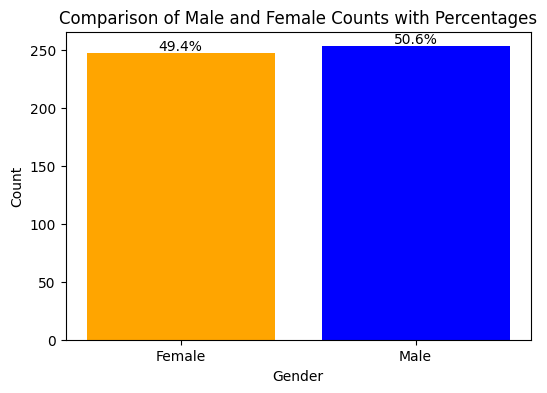

In [8]:

sex_counts = df['gender'].value_counts()

total = len(df['gender'])
percentages = (sex_counts / total) * 100

labels = {1: 'Male', 0: 'Female'}

# Plotting bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'orange'])

# Adding percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percentage:.1f}%', ha='center', va='bottom')

# Adding labels and title
plt.title('Comparison of Male and Female Counts with Percentages')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=[labels[0], labels[1]])  # Set x-axis labels
plt.show()


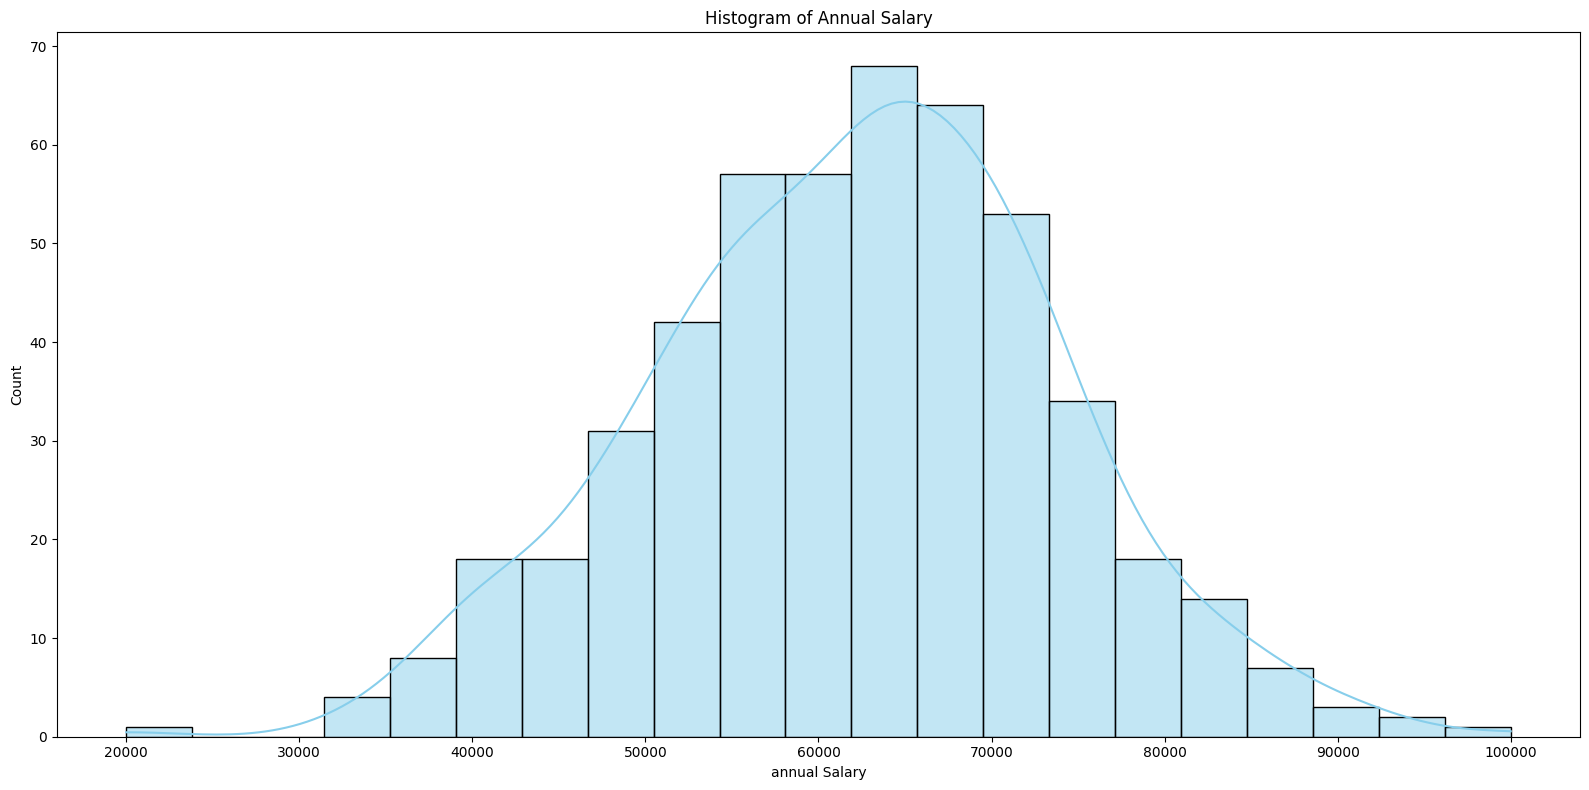

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['annual Salary'], ax=ax, kde=True, color='skyblue')

ax.set_title('Histogram of Annual Salary')

plt.tight_layout()

plt.show()

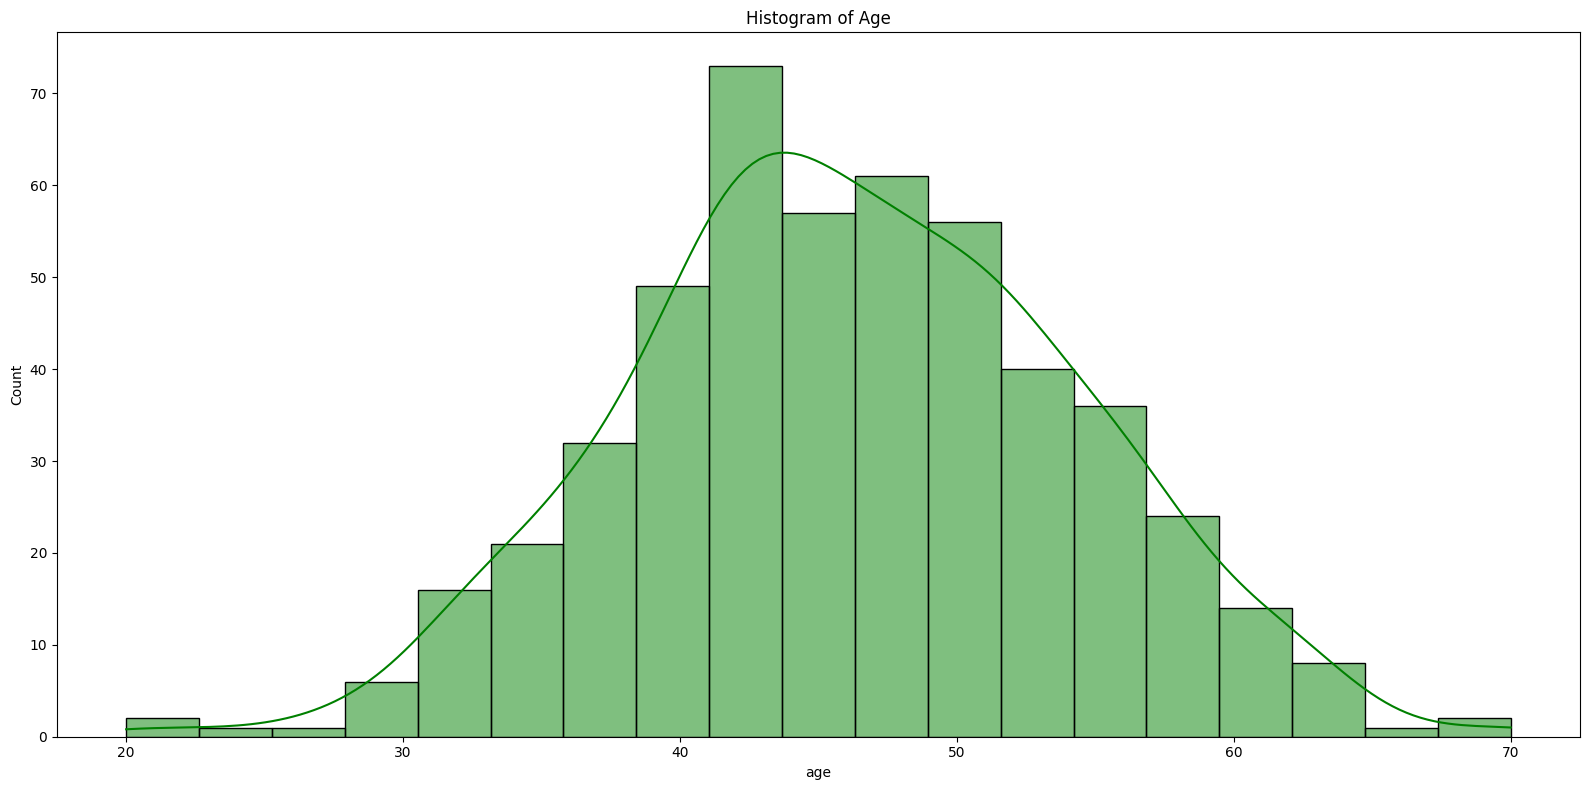

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['age'], ax=ax, kde=True, color='green')

ax.set_title('Histogram of Age')

plt.tight_layout()

plt.show()

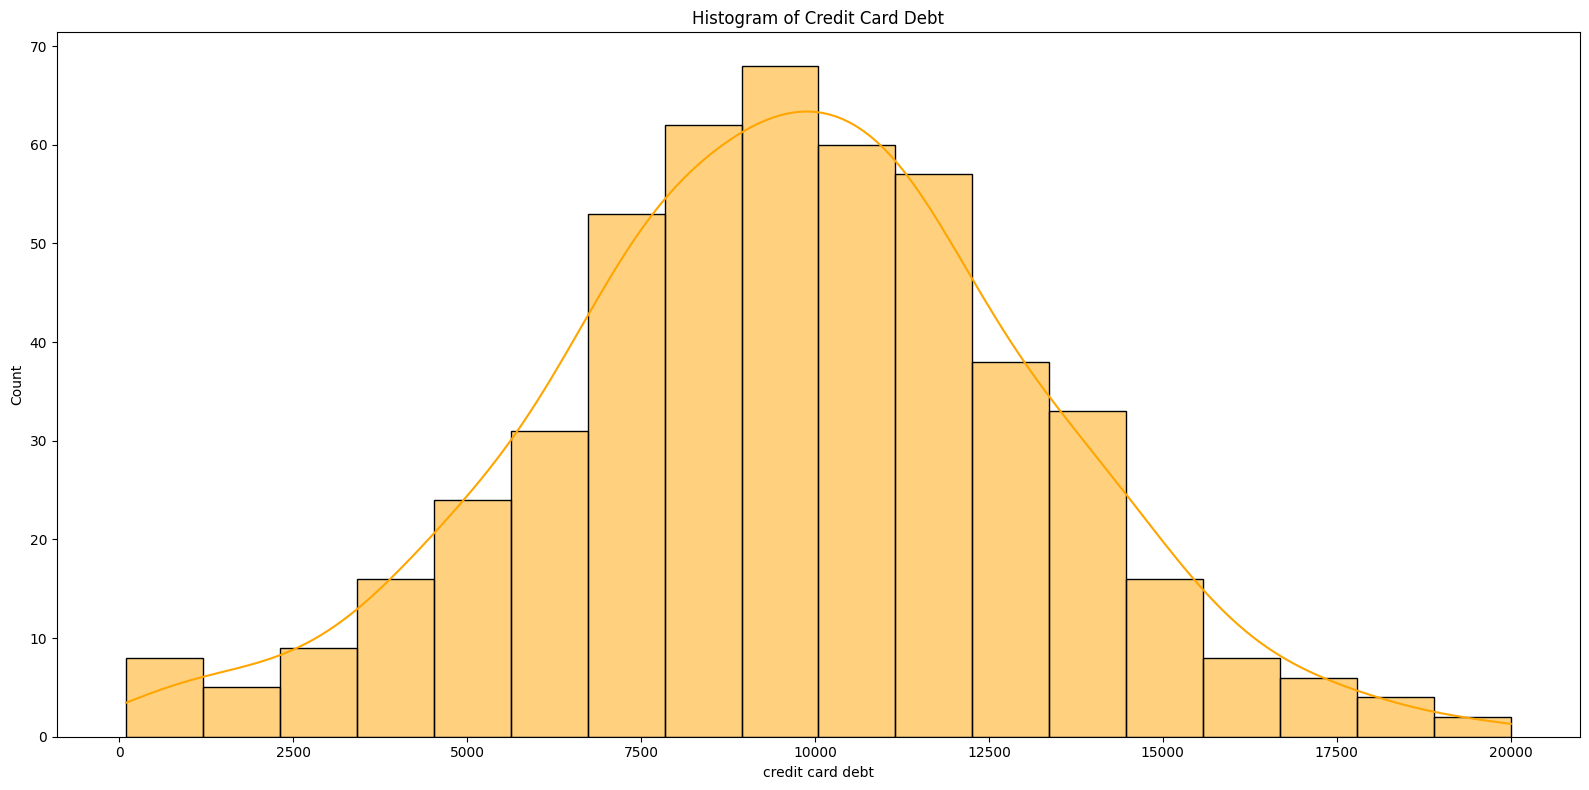

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['credit card debt'], ax=ax, kde=True, color='orange')

ax.set_title('Histogram of Credit Card Debt')

plt.tight_layout()

plt.show()

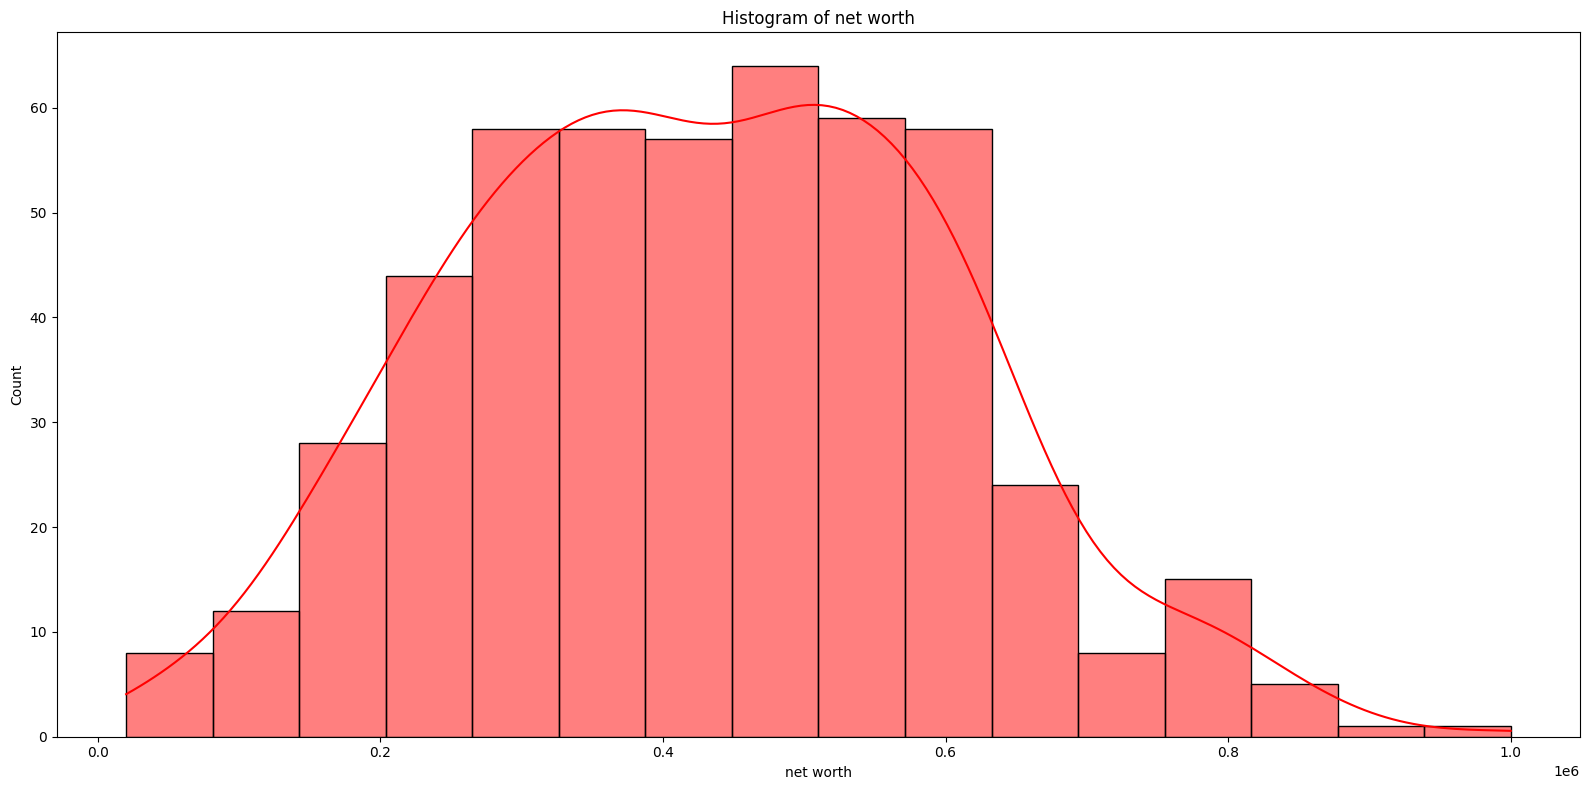

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['net worth'], ax=ax, kde=True, color='red')

ax.set_title('Histogram of net worth')

plt.tight_layout()

plt.show()

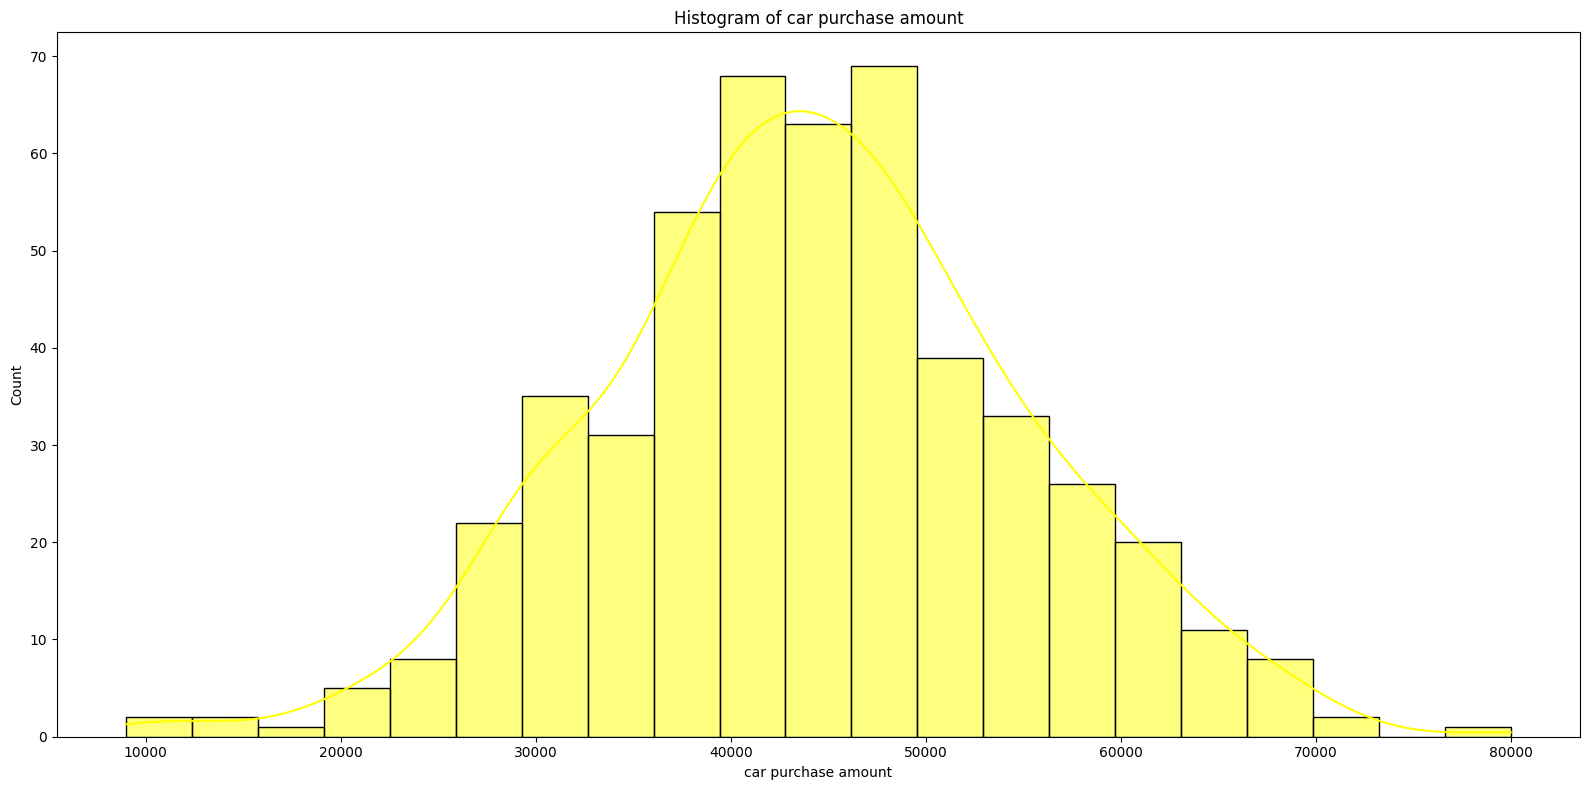

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['car purchase amount'], ax=ax, kde=True, color='yellow')

ax.set_title('Histogram of car purchase amount')

plt.tight_layout()

plt.show()

In [14]:
Q1 = df['car purchase amount'].quantile(0.25)
Q3 = df['car purchase amount'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the thresholds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['car purchase amount'] >= lower_bound) & (df['car purchase amount'] <= upper_bound)]

# Check the shape of the original and filtered DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")

Original DataFrame shape: (500, 6)
Filtered DataFrame shape: (495, 6)


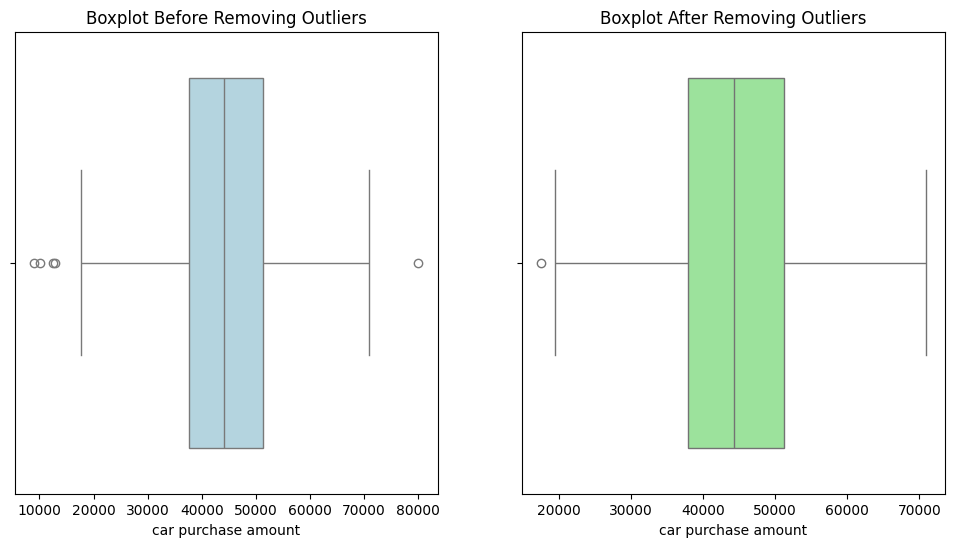

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['car purchase amount'], color='lightblue')
plt.title('Boxplot Before Removing Outliers')

# Plot boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['car purchase amount'], color='lightgreen')
plt.title('Boxplot After Removing Outliers')

plt.show()

In [16]:

X = df.drop(['car purchase amount'], axis=1)
y = df['car purchase amount']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

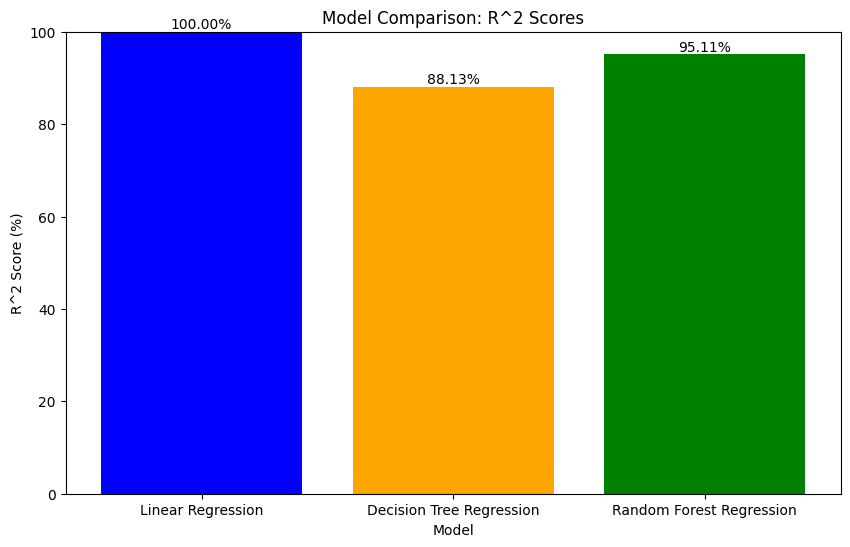

In [19]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    results[name] = r2
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), [r*100 for r in results.values()], color=['blue', 'orange', 'green'])
for bar, r2 in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{r2*100:.2f}%', ha='center', va='bottom')
plt.title('Model Comparison: R^2 Scores')
plt.xlabel('Model')
plt.ylabel('R^2 Score (%)')
plt.ylim(0, 100)  # Adjust y-axis to show percentage
plt.show()
